# PROBLEM STATEMENT

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase

Data Collection Phase

You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model

In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
at last target variable Price of the car. This data is to give you a hint about important variables in 
used car model. You can make changes to it, you can add or you can remove some columns, it 
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
Hatchback.


Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.


Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all 
data pre-processing steps. Try different models with different hyper parameters and select the best 
model.


Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best modEL

# DATA COLLECTION

In [1]:
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException     #importing exception


import warnings
warnings.filterwarnings('ignore')

In [2]:
driver=webdriver.Chrome('chromedriver.exe')

In [3]:
#scrap cars details from cardekho
driver.get("https://www.cardekho.com/used-cars+in+new-delhi")

In [4]:
#create empty list
cars=[]
variant=[]
model=[]
EMI=[]
fuel=[]
model=[]
price=[]
distance_covered=[]

In [5]:
#price
for i in driver.find_elements_by_xpath('//span[@class="amnt "]'):
    price.append(i.text)
len(price)

4181

In [6]:
#EMI
for i in driver.find_elements_by_xpath('//div[@class="emitextCard"]'):
    EMI.append(i.text)
len(EMI)

4181

In [7]:
#other details
detail=[]
for i in driver.find_elements_by_xpath('//div[@class="truncate dotlist"]/span'):
    detail.append(i.text)

In [8]:
#fuel
fuel=detail[1::3]
len(fuel)

4181

In [9]:
#distance_covered
distance_covered=detail[::3]
len(distance_covered)

4181

In [10]:
for i in driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7  carsName"]/a'):
    cars.append(i.text)
len(cars)    
#swipe up manually to load more data as there is no option for next page

4181

In [11]:
for i in driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7  carsName"]/div'):
    model.append(i.text)
    
#swipe up manually to load more data as there is no option for next page

In [12]:
model=model[::2]
len(model)

4181

In [13]:
data=pd.DataFrame()
data["Cars"]=cars
data["Model"]=model
data["Fuel"]=fuel
data["Distance"]=distance_covered
data["EMI"]=EMI
data["Price"]=price
data

,Cars,Model,Fuel,Distance,EMI,Price
0,2020 Skoda Rapid,1.0 TSI Style,Petrol,"8,826 kms","EMI @ ₹ 22,759","11,24,000"
1,2021 Datsun RediGO,1.0 T Option,Petrol,"1,233 kms","EMI @ ₹ 9,436","4,66,000"
2,2017 Hyundai Creta,1.6 VTVT AT SX Plus,Petrol,"91,147 kms","EMI @ ₹ 31,253","10,38,000"
3,2019 Maruti Ignis,1.2 AMT Delta BSIV,Petrol,"33,065 kms","EMI @ ₹ 11,947","5,90,000"
4,2019 Honda Amaze,S,Petrol,"14,689 kms","EMI @ ₹ 12,757","6,30,000"
...,...,...,...,...,...,...
4176,2012 Mercedes-Benz C-Class,220 CDI AT,Diesel,"37,000 kms",,"8,90,000"
4177,2017 Maruti Ciaz,1.4 Alpha,Petrol,"80,000 kms",,"7,40,000"
4178,2019 Maruti Swift,VXI,Petrol,"30,000 kms",,"4,70,000"
4179,2008 Maruti Alto,LXi,Petrol,"90,000 kms",,"80,000"


# model building

In [14]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [15]:
data

,Cars,Model,Fuel,Distance,EMI,Price
0,2020 Skoda Rapid,1.0 TSI Style,Petrol,"8,826 kms","EMI @ ₹ 22,759","11,24,000"
1,2021 Datsun RediGO,1.0 T Option,Petrol,"1,233 kms","EMI @ ₹ 9,436","4,66,000"
2,2017 Hyundai Creta,1.6 VTVT AT SX Plus,Petrol,"91,147 kms","EMI @ ₹ 31,253","10,38,000"
3,2019 Maruti Ignis,1.2 AMT Delta BSIV,Petrol,"33,065 kms","EMI @ ₹ 11,947","5,90,000"
4,2019 Honda Amaze,S,Petrol,"14,689 kms","EMI @ ₹ 12,757","6,30,000"
...,...,...,...,...,...,...
4176,2012 Mercedes-Benz C-Class,220 CDI AT,Diesel,"37,000 kms",,"8,90,000"
4177,2017 Maruti Ciaz,1.4 Alpha,Petrol,"80,000 kms",,"7,40,000"
4178,2019 Maruti Swift,VXI,Petrol,"30,000 kms",,"4,70,000"
4179,2008 Maruti Alto,LXi,Petrol,"90,000 kms",,"80,000"


In [16]:
data.shape

(4181, 6)

In [17]:
data.isnull().sum()

Cars        0
Model       0
Fuel        0
Distance    0
EMI         0
Price       0
dtype: int64

In [50]:
data.describe()

,Cars,Model,Fuel,Distance,EMI,Price
count,4181.000000,4181.000000,4181.00000,4181.000000,4181.000000,4181.000000
mean,422.511122,530.591007,2.54652,388.257833,331.274815,427.255920
std,203.663028,288.539187,1.52163,202.643352,325.583907,225.366374
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,259.000000,290.000000,1.00000,218.000000,0.000000,236.000000
50%,420.000000,553.000000,4.00000,392.000000,256.000000,451.000000
75%,589.000000,792.000000,4.00000,551.000000,617.000000,612.000000
max,787.000000,1014.000000,4.00000,740.000000,986.000000,809.000000


# label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

data = data.copy()
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])
data   

,Cars,Model,Fuel,Distance,EMI,Price
0,729,14,4,658,459,78
1,742,13,4,40,943,497
2,468,189,4,719,602,58
3,647,22,4,268,169,601
4,615,704,4,112,187,639
...,...,...,...,...,...,...
4176,150,301,1,301,0,764
4177,487,88,4,663,0,704
4178,648,853,4,240,0,500
4179,24,628,4,714,0,770


# seperating labels and features

In [19]:
x=data.drop(["Price"],axis=1)
y=data["Price"]

In [20]:
x

,Cars,Model,Fuel,Distance,EMI
0,729,14,4,658,459
1,742,13,4,40,943
2,468,189,4,719,602
3,647,22,4,268,169
4,615,704,4,112,187
...,...,...,...,...,...
4176,150,301,1,301,0
4177,487,88,4,663,0
4178,648,853,4,240,0
4179,24,628,4,714,0


In [21]:
y

0        78
1       497
2        58
3       601
4       639
       ... 
4176    764
4177    704
4178    500
4179    770
4180      1
Name: Price, Length: 4181, dtype: int32

# checking correlation

In [22]:
data.corr()

,Cars,Model,Fuel,Distance,EMI,Price
Cars,1.000000,0.069024,0.110107,-0.330359,0.525396,0.274132
Model,0.069024,1.000000,0.063028,-0.005707,0.011783,0.043822
Fuel,0.110107,0.063028,1.000000,-0.192386,0.004280,0.051569
Distance,-0.330359,-0.005707,-0.192386,1.000000,-0.143505,-0.049307
EMI,0.525396,0.011783,0.004280,-0.143505,1.000000,0.072332
Price,0.274132,0.043822,0.051569,-0.049307,0.072332,1.000000


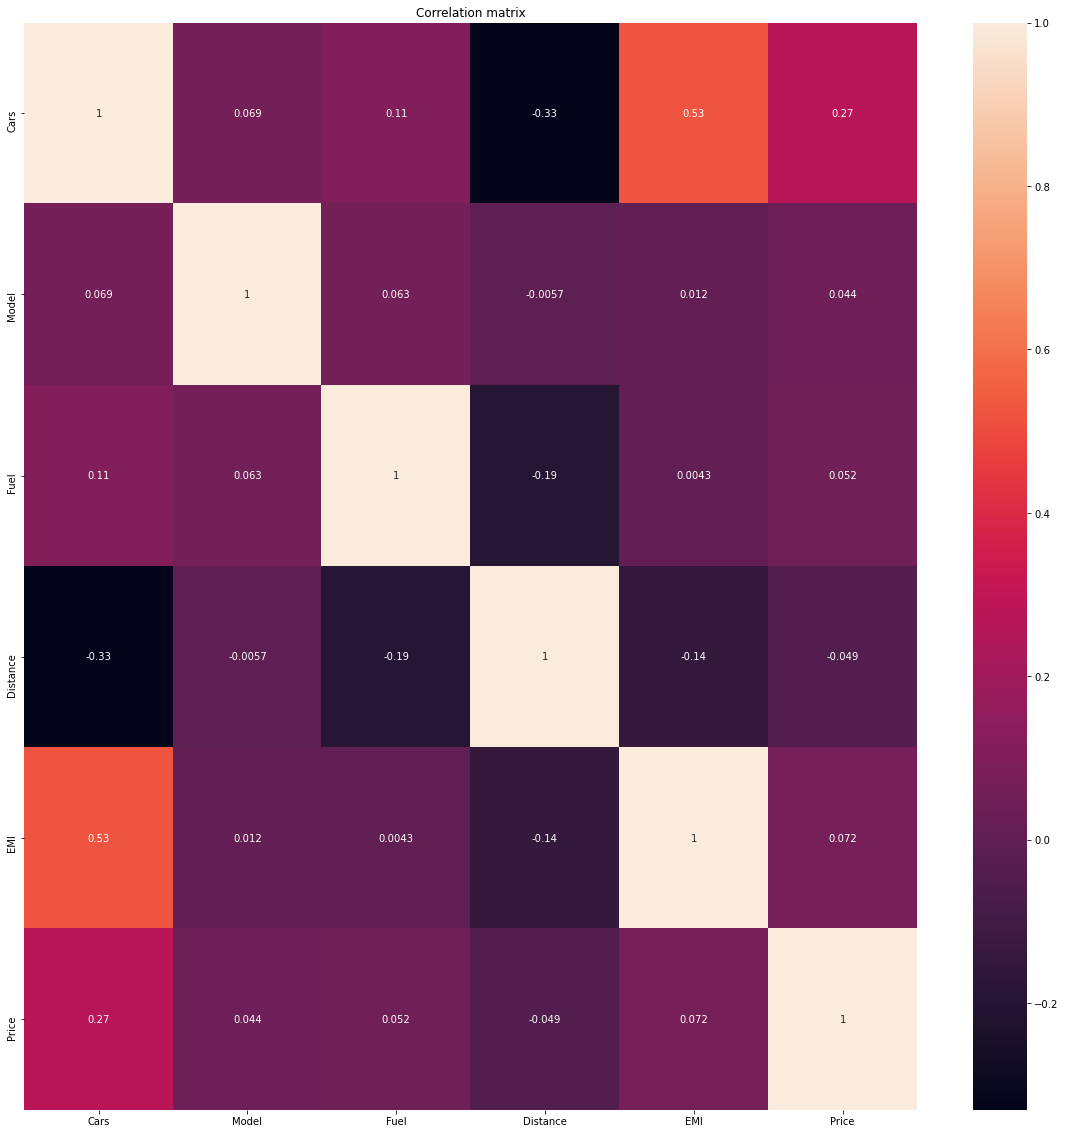

In [23]:
#plotting graph for correlation
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

In [24]:
corr_matrix=data.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price       1.000000
Cars        0.274132
EMI         0.072332
Fuel        0.051569
Model       0.043822
Distance   -0.049307
Name: Price, dtype: float64

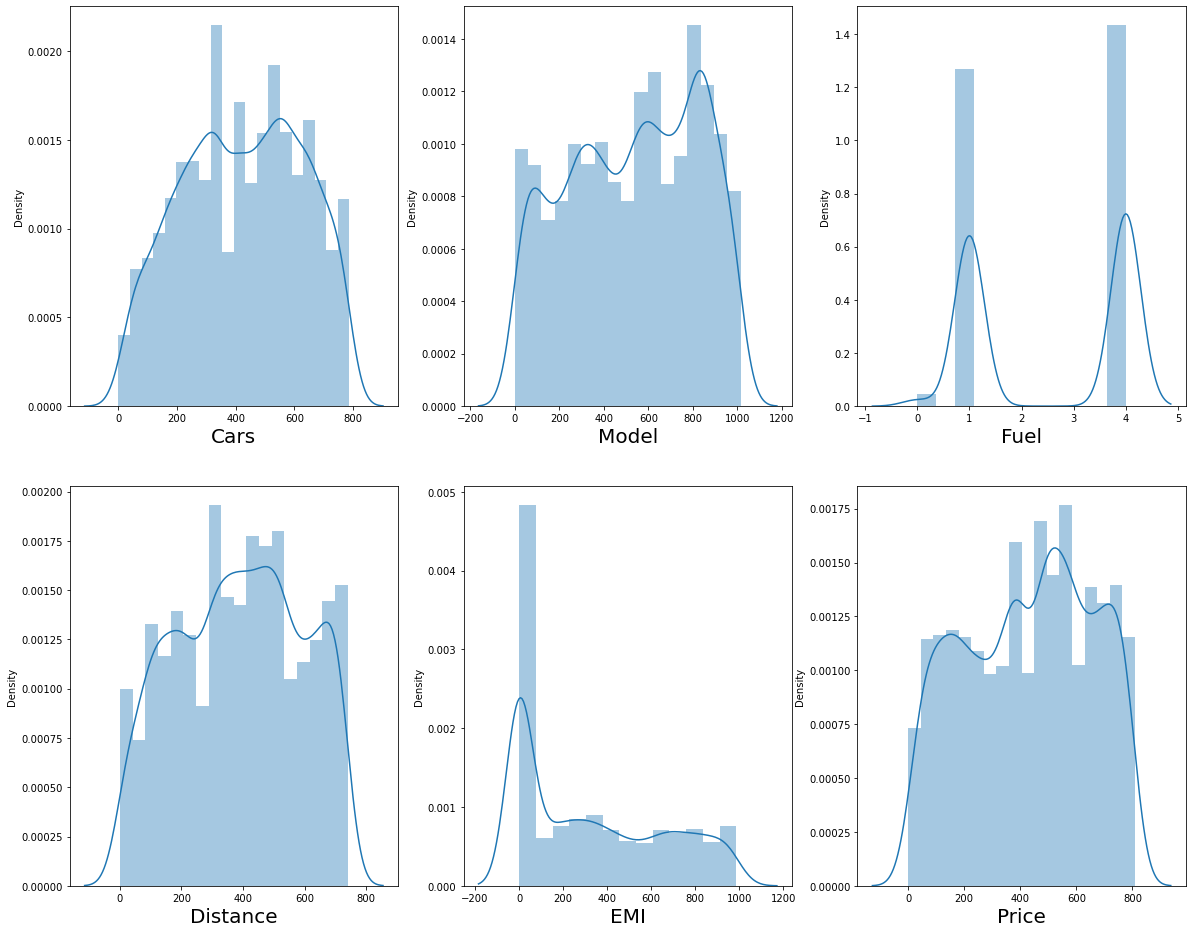

In [25]:
#let's check the data distribution among all the columns



plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# checking skewness

In [26]:
x.skew().sort_values()

Model      -0.160855
Fuel       -0.110294
Cars       -0.098900
Distance   -0.077934
EMI         0.516128
dtype: float64

data is all fine we are good to go

# check for outliers

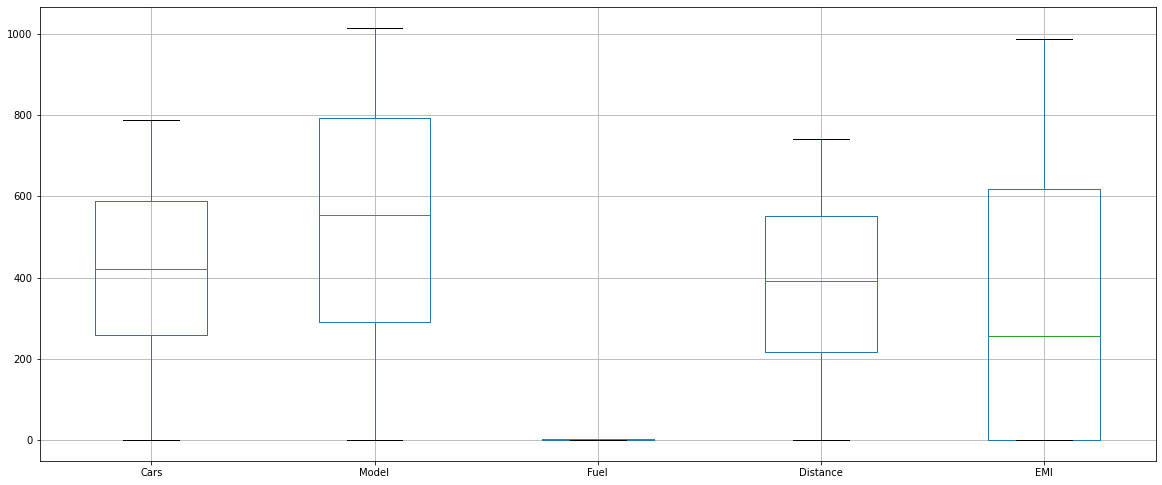

In [28]:
#plotting boxplot for columns
x.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

there is no outlier so we can proceed

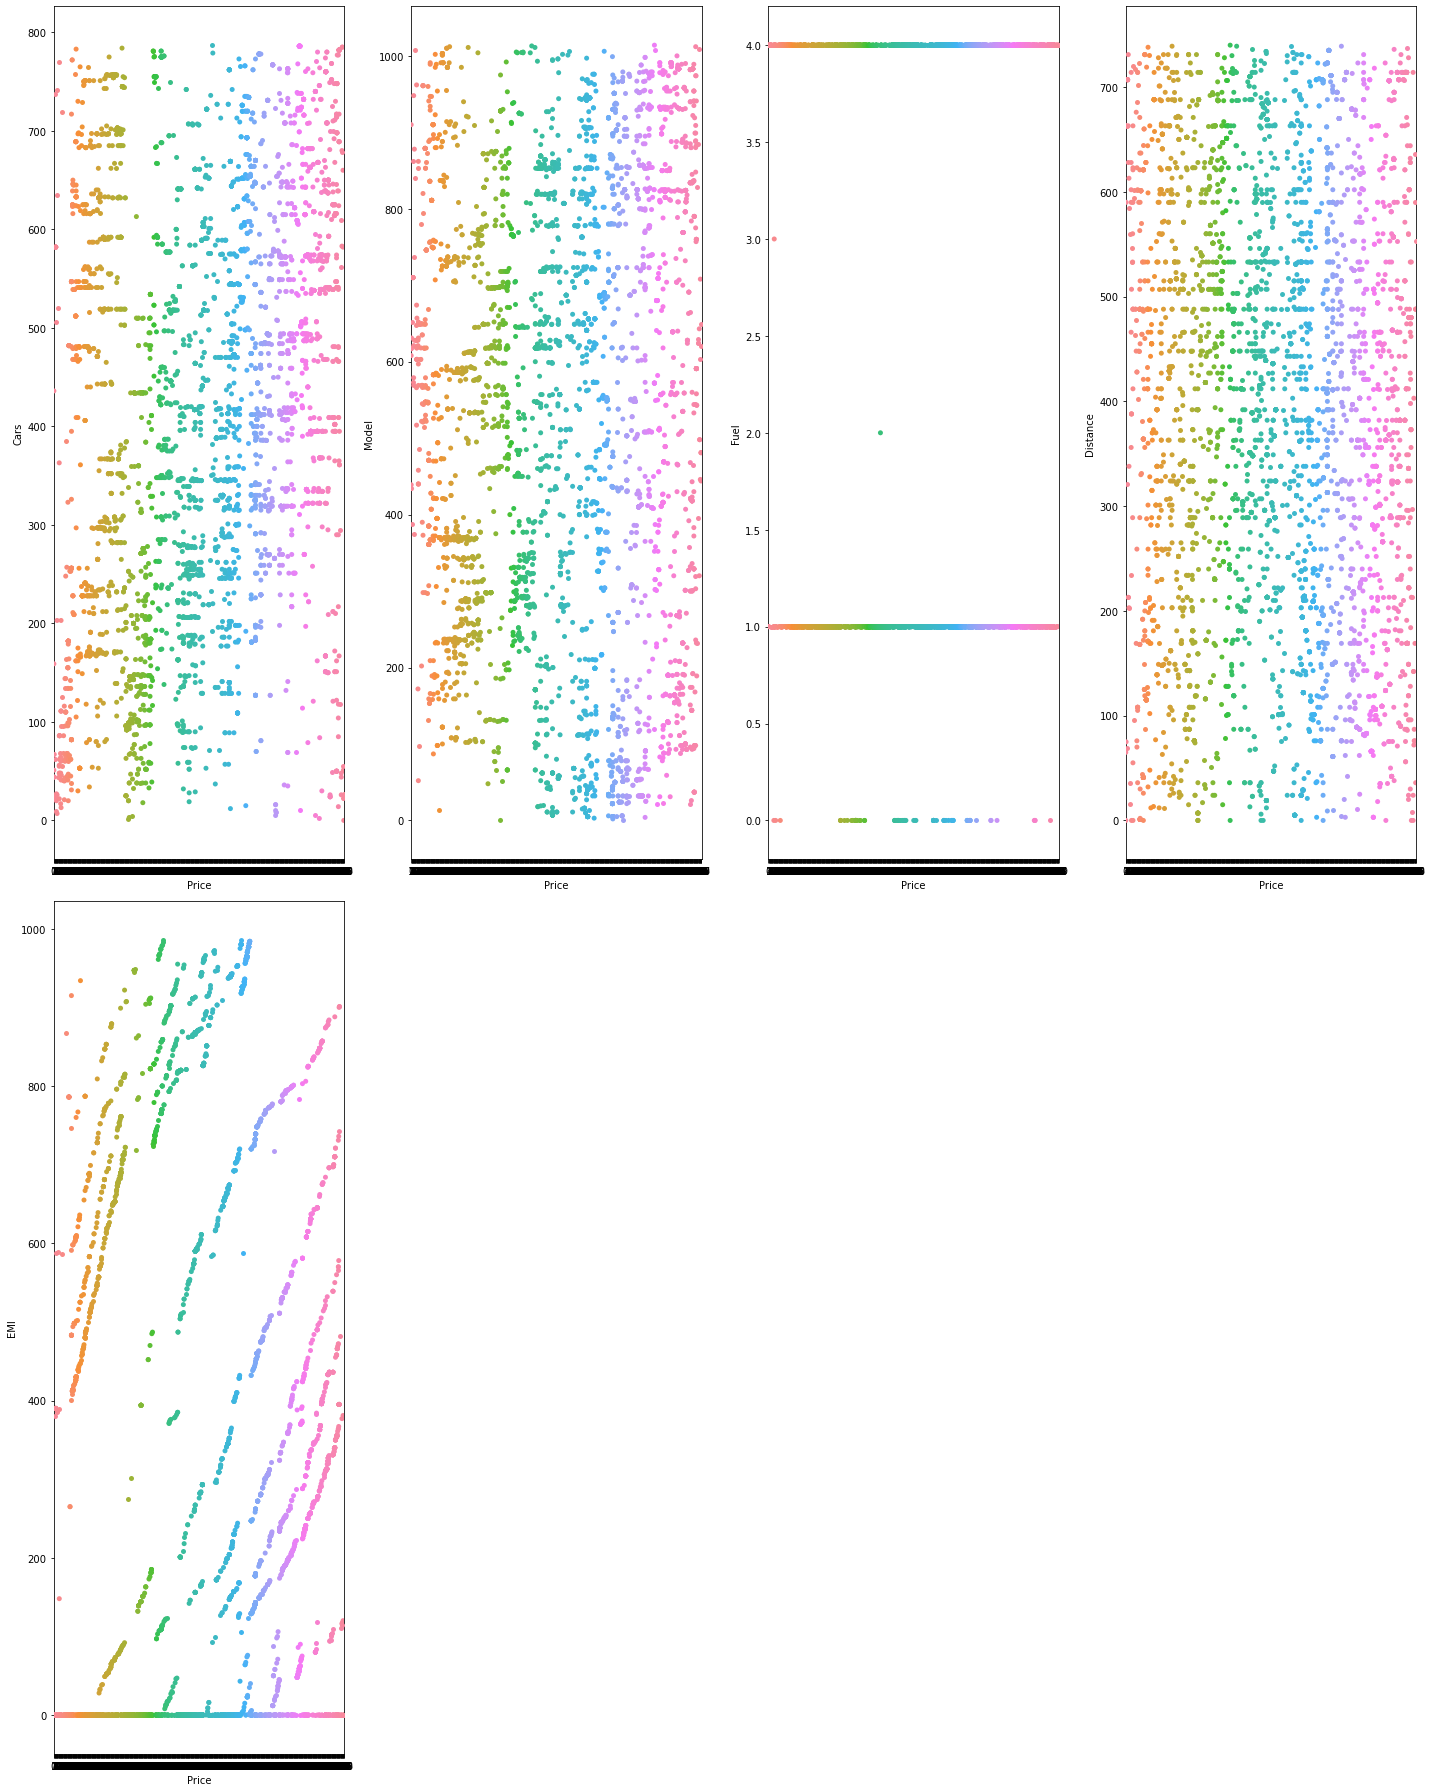

In [29]:
#let's see how features are related to class
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


greta let's proceed by checking multicollinearity in the dependent variables. before that we should scale our data. let's use standard scalar for that

# data scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [31]:
x_scaled

array([[ 1.50506226, -1.79058104,  0.95532648,  1.33127698,  0.39234268],
       [ 1.56890083, -1.79404719,  0.95532648, -1.71878073,  1.87908045],
       [ 0.22338035, -1.18400509,  0.95532648,  1.63233446,  0.83160611],
       ...,
       [ 1.10729891,  1.11751738,  0.95532648, -0.73170703, -1.01760078],
       [-1.95695209,  0.33763402,  0.95532648,  1.60765762, -1.01760078],
       [-1.96186275, -0.33479875,  0.95532648,  0.99567193, -1.01760078]])

finding variance inflation factor in each scaled column i.e. x_scaled1

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.536770,Cars
1,1.009413,Model
2,1.048121,Fuel
3,1.156243,Distance
4,1.388848,EMI


all the vif values are less than 5 and are very low. that means no multicollinearity. now, we can go ahead with fitting our data to the model. before that let's split our data in test and training set

# training process

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [34]:
#finding  best random state
maxAccu=0     #maximum accuracy
maxRS=0       #best random state value for which max accuracy is achieved

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is :",maxAccu,"on Random_state",maxRS)

Best Accuracy is : 0.11355270120399596 on Random_state 77


# creating train test split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=77)

In [52]:
x_train

array([[-0.53777174, -0.0436423 , -1.01647869,  0.80319256,  0.19267748],
       [-0.95517772, -0.56703069, -1.01647869,  1.69155888, -1.01760078],
       [-1.13687209,  0.71544418, -1.01647869,  0.29484961, -1.01760078],
       ...,
       [-1.00428431, -0.02631156, -1.01647869,  1.14866835, -1.01760078],
       [ 0.58185844, -1.49942458, -1.01647869,  0.42316919,  0.43227572],
       [ 1.40193843, -1.72819037,  0.95532648, -1.47694767, -0.43396405]])

In [53]:
x_test

array([[-0.45429054,  0.86448856,  0.95532648,  1.55830393,  1.19407524],
       [ 0.90596191, -0.68834588, -1.01647869, -0.48987398,  1.51968309],
       [ 0.44435999, -1.64846896,  0.95532648, -1.24992072,  1.86986513],
       ...,
       [-1.38731569,  0.38269394, -1.01647869, -1.79774662, -1.01760078],
       [-0.62616359, -1.1632082 ,  0.95532648,  1.39543677, -1.01760078],
       [ 1.17604813,  1.34974932, -1.01647869, -0.12465671,  0.95140523]])

In [54]:
y_train

676     243
2995    105
3059    147
648     566
2620     33
       ... 
1317    350
2283    380
2004    253
3668    793
607     644
Name: Price, Length: 3135, dtype: int32

In [55]:
y_test

49      550
1734    416
315     410
2488    459
3601    433
       ... 
1053    124
1899    326
1620    489
2080    663
3642    159
Name: Price, Length: 1046, dtype: int32

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
#Ajusted r2 score
lr.score(x_train,y_train)*100

7.548289361790084

lets check how well it fits our data

In [58]:
lr.score(x_test,y_test)*100

11.355270120399597

# cross validation of the model

In [59]:
train_accuracy=lr.score(x_train,y_train)
test_accuracy=lr.score(x_test,y_test)
from sklearn.model_selection import cross_val_score,GridSearchCV
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
    

0.05747344225807956

In [60]:
y_pred=lr.predict(x_test)

In [61]:
y_pred

array([404.91681438, 451.82266458, 408.20104633, ..., 320.33905836,
       417.59318903, 496.40179081])

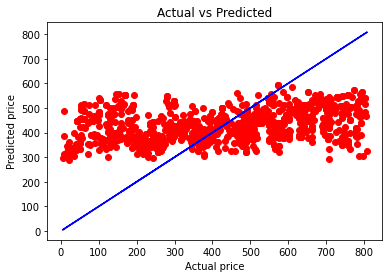

In [62]:
#plot the scatter plot between actual and predicted price
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted")
plt.show()

# hyper parameter tunning

In [63]:
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [64]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2_score :',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross_val_score :',rfc*100)

R2_score : 89.20916800263686
Cross_val_score : 78.98715452264283


# save model for later use

In [65]:
import pickle
filename='car price prediction.pkl'
pickle.dump(rf,open(filename,'wb'))